# Exercise: NEISS, Question Set F

#### Summary

The [National Electronic Injury Surveillance System](https://www.cpsc.gov/Safety-Education/Safety-Guides/General-Information/National-Electronic-Injury-Surveillance-System-NEISS) is a data product produced by the US Consumer Product Safety Commission. It tracks emergency room injuries related to consumer products (e.g., "a door fell on me!").

#### Files

- **nss15.tsv**: injury data (one injury per row)
- **2017NEISSCodingManualCPSConlyNontrauma.pdf**: column definitions and explanations
- **2015 Neiss data highlights.pdf**: a partial summary of the data
- **2017ComparabilityTable.pdf**: product code definitions
- **categories-cleaned.txt**: product code definitions in CSV format (great for joining!)

#### Source

https://www.cpsc.gov/Safety-Education/Safety-Guides/General-Information/National-Electronic-Injury-Surveillance-System-NEISS

#### Skills

- Reading tab-separated files
- Ignoring bad lines
- Replacing values
- Using numpy/`np.nan`
- String search using regular expressions
- String replacement using regular expressions
- Using codebooks

# Read in `nss15.tsv`

Some of the lines just **aren't formatted correctly**. Maybe we can avoid those?

In [95]:
import pandas as pd
%matplotlib inline

In [96]:
df = pd.read_csv('nss15.tsv', error_bad_lines = False, sep = "\t")

b'Skipping line 10822: expected 19 fields, saw 20\n'
b'Skipping line 48623: expected 19 fields, saw 20\nSkipping line 62534: expected 19 fields, saw 20\n'
b'Skipping line 103739: expected 19 fields, saw 20\n'
b'Skipping line 135495: expected 19 fields, saw 20\nSkipping line 151678: expected 19 fields, saw 20\n'
b'Skipping line 237135: expected 19 fields, saw 20\nSkipping line 240597: expected 19 fields, saw 20\n'
b'Skipping line 274270: expected 19 fields, saw 20\nSkipping line 277461: expected 19 fields, saw 20\n'


In [97]:
df.head()

,CPSC Case #,trmt_date,psu,weight,stratum,age,sex,race,race_other,diag,diag_other,body_part,disposition,location,fmv,prod1,prod2,narr1,narr2
0,150733174,07/11/2015,38,15.7762,V,5,1,0,NaN,57,NaN,33,1,9,0,1267,NaN,5 YR OLD MALE PLAYING SOCCER BLOCKING BALL AND...,X IT
1,150734723,07/06/2015,43,83.2157,S,36,1,1,NaN,57,NaN,34,1,1,0,1439,4057.0,"L WRIST FX(?)/36YOWM 2 WKS AGO@G-FRIENDS HM,MO...",AN OBJECT&TWISTED WRIST TRYING TO CONTOL MOWER...
2,150817487,08/02/2015,51,74.8813,L,20,2,0,NaN,71,OTITIS EXTERNA,94,1,0,0,3274,NaN,20 YO F C/O EAR PAIN 1 DAY SAS WAS SWIMMING YE...,T TRIED TO USE ***S TO REMOVE WAX MADE IT WORS...
3,150717776,06/26/2015,41,15.7762,V,61,1,0,NaN,71,PAIN,35,1,0,0,611,NaN,61YOM W/KNEE PAIN S/P FALLING IN SHOWER 2 DAYS...,NaN
4,150721694,07/04/2015,42,74.8813,L,88,2,3,HISPANIC,62,NaN,75,1,0,0,1893,1807.0,88YOF PAIN TO HEAD WHEN FALL TO FLOOR WHEN WAL...,DOOR AND FELL.DENIES LOC. DX HEAD INJURY


### Check that your dataframe has 357727 rows and 19 columns.

In [98]:
df.shape

(357727, 19)

### List the columns and their data types

In [99]:
df.columns

Index(['CPSC Case #', 'trmt_date', 'psu', 'weight', 'stratum', 'age', 'sex',
       'race', 'race_other', 'diag', 'diag_other', 'body_part', 'disposition',
       'location', 'fmv', 'prod1', 'prod2', 'narr1', 'narr2'],
      dtype='object')

### What does each column mean?

In [100]:
#treatment date, prod = product used, narr2 = narrative given about accident, narr1 = patient description 

# Cleaning up a column

Take a look at the **race** column. How many rows of each race are there?

In [101]:
#There is race and race other 

## Replace the numbers with the appropriate words they stand for.

Those numbers are terrible - codes are fine for storage but not really for reading. **Replace the numbers with the  words they stand for.**

Refer to page 28 of the column definitions file.

In [102]:
df['race'].value_counts()

1    145813
0    138666
2     48868
3     18884
4      4130
5      1000
6       366
Name: race, dtype: int64

In [103]:
#save into column and then the dataframe 
df.race = df['race'].replace(1,'White')
df.race = df['race'].replace(2, 'African American')
df.race = df['race'].replace(3, 'Other')
df.race = df['race'].replace(4, 'Asian')
df.race = df['race'].replace(5, 'American Indian')
df.race = df['race'].replace(6, 'Pacific Islander')
df.race = df['race'].replace(0, 'Not Stated')
df.head()

,CPSC Case #,trmt_date,psu,weight,stratum,age,sex,race,race_other,diag,diag_other,body_part,disposition,location,fmv,prod1,prod2,narr1,narr2
0,150733174,07/11/2015,38,15.7762,V,5,1,Not Stated,NaN,57,NaN,33,1,9,0,1267,NaN,5 YR OLD MALE PLAYING SOCCER BLOCKING BALL AND...,X IT
1,150734723,07/06/2015,43,83.2157,S,36,1,White,NaN,57,NaN,34,1,1,0,1439,4057.0,"L WRIST FX(?)/36YOWM 2 WKS AGO@G-FRIENDS HM,MO...",AN OBJECT&TWISTED WRIST TRYING TO CONTOL MOWER...
2,150817487,08/02/2015,51,74.8813,L,20,2,Not Stated,NaN,71,OTITIS EXTERNA,94,1,0,0,3274,NaN,20 YO F C/O EAR PAIN 1 DAY SAS WAS SWIMMING YE...,T TRIED TO USE ***S TO REMOVE WAX MADE IT WORS...
3,150717776,06/26/2015,41,15.7762,V,61,1,Not Stated,NaN,71,PAIN,35,1,0,0,611,NaN,61YOM W/KNEE PAIN S/P FALLING IN SHOWER 2 DAYS...,NaN
4,150721694,07/04/2015,42,74.8813,L,88,2,Other,HISPANIC,62,NaN,75,1,0,0,1893,1807.0,88YOF PAIN TO HEAD WHEN FALL TO FLOOR WHEN WAL...,DOOR AND FELL.DENIES LOC. DX HEAD INJURY


## Confirm you have 145813 White, 138666 not stated, and 48868 Black.

In [104]:
df['race'].value_counts()

White               145813
Not Stated          138666
African American     48868
Other                18884
Asian                 4130
American Indian       1000
Pacific Islander       366
Name: race, dtype: int64

## Graph the number of each race, but don’t included the “Not Stated” records

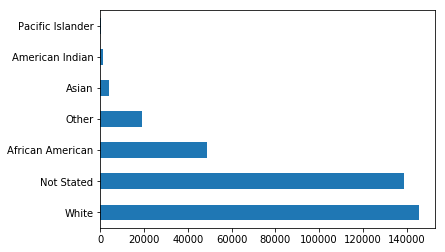

In [105]:
race_chart = df[df.race != 'Note Stated'].race.value_counts()
race_chart.plot(kind = 'barh')

## "Not Stated" seems silly - change it to be `NaN` instead

Don't use `na_values` for this.

In [106]:
#want to talk about NaN? We need numpy. Numpy is the number stuff underneath pandas 
import numpy as np
np.nan

nan

In [107]:
df['race'].replace('Not Stated', np.nan, inplace=True)
df['race'].value_counts(dropna=False)
#want to still see the NaN values? value_counts(dropna=False)

White               145813
NaN                 138666
African American     48868
Other                18884
Asian                 4130
American Indian       1000
Pacific Islander       366
Name: race, dtype: int64

## Graph the count of each race, but don’t included the “Not Stated” records

Yes, again! The code you use should be different this time.

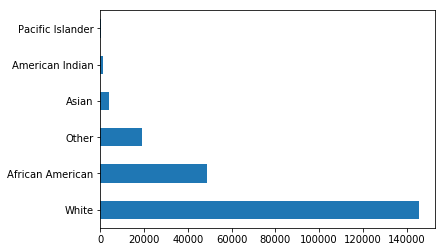

In [108]:
df['race'].value_counts().plot(kind = 'barh')
#value_counts() will automatically ignore the NaN values 


## Graph the top 10 most popular products for injuries 

In [109]:
df['prod1'].value_counts().head(10)

1842    28609
1807    28255
4076    16707
1205    14095
5040    12737
1211    11614
4074     8239
1884     7755
1893     7689
4057     7327
Name: prod1, dtype: int64

# Cleaning up `race_other`

## `race_other` is a field for free-form race input. How many patients have a race of "HISPANIC"?

In [110]:
df['race_other'].str.contains('HISPANIC').value_counts()

True     14392
False     5955
Name: race_other, dtype: int64

## What are the top 5 most popular "other" races?

In [111]:
df['race_other'].value_counts().head(5)

HISPANIC        14389
MULTI-RACIAL     1727
UNKNOWN          1554
HISP             1334
NS                495
Name: race_other, dtype: int64

## Searching for multiracial patients

Wow, this data entry is terrible. “Multiracial” is spelled as **MULT RACIAL**, **MULTIPLE RACIAL**, and many more. How many different spellings can you find? **Use only one line to find the spellings.**

- Tip: Be sure to **ignore the na values**.
- Tip: You should probably find the multiracial-ish rows and then `value_counts` their `other_race`
- Tip: Maybe... ask me about .str.contains support for regular expressions?

In [119]:
#df['race_other'].value_counts().sort_values(ascending = False)
df['race_other'].str.contains("MULT.*").value_counts()

False    18436
True      1911
Name: race_other, dtype: int64

## Replace all of those spellings with “MULTIRACIAL.”

Confirm that you’ve ended up with about 1900 MULTIRACIAL rows (yours might be anywhere between 1899-1910, depending on how many spellings you caught)

In [120]:
df.race_other = df['race_other'].replace('MULTRACIAL', 'MULTIRACIAL')
df.race_other = df['race_other'].replace('MULTI-RACIAL', 'MULTIRACIAL')
df.race_other = df['race_other'].replace('MULTI', 'MULTIRACIAL')
df.race_other = df['race_other'].replace('MULTIRACAIL', 'MULTIRACIAL')
df.race_other = df['race_other'].replace('MULT RACIAL', 'MULTIRACIAL')
df.head(50)
#df.race = df['race'].replace(1,'White')

,CPSC Case #,trmt_date,psu,weight,stratum,age,sex,race,race_other,diag,diag_other,body_part,disposition,location,fmv,prod1,prod2,narr1,narr2
0,150733174,07/11/2015,38,15.7762,V,5,1,NaN,NaN,57,NaN,33,1,9,0,1267,NaN,5 YR OLD MALE PLAYING SOCCER BLOCKING BALL AND...,X IT
1,150734723,07/06/2015,43,83.2157,S,36,1,White,NaN,57,NaN,34,1,1,0,1439,4057.0,"L WRIST FX(?)/36YOWM 2 WKS AGO@G-FRIENDS HM,MO...",AN OBJECT&TWISTED WRIST TRYING TO CONTOL MOWER...
2,150817487,08/02/2015,51,74.8813,L,20,2,NaN,NaN,71,OTITIS EXTERNA,94,1,0,0,3274,NaN,20 YO F C/O EAR PAIN 1 DAY SAS WAS SWIMMING YE...,T TRIED TO USE ***S TO REMOVE WAX MADE IT WORS...
3,150717776,06/26/2015,41,15.7762,V,61,1,NaN,NaN,71,PAIN,35,1,0,0,611,NaN,61YOM W/KNEE PAIN S/P FALLING IN SHOWER 2 DAYS...,NaN
4,150721694,07/04/2015,42,74.8813,L,88,2,Other,HISPANIC,62,NaN,75,1,0,0,1893,1807.0,88YOF PAIN TO HEAD WHEN FALL TO FLOOR WHEN WAL...,DOOR AND FELL.DENIES LOC. DX HEAD INJURY
5,150721815,07/02/2015,32,5.6748,C,216,2,White,NaN,71,DOG SCRATCH/BITE,76,1,1,0,1715,NaN,16 MOF AT HOME PULLED FAMILY DOG-HUSKIES COLLA...,"ND SCRAPING TEETH ON PTS FACE, NOT A TRUE BITE..."
6,150713483,06/08/2015,93,15.7762,V,25,1,African American,NaN,51,NaN,33,4,9,3,1138,NaN,25 YOM WAS CAMPING WHEN FRIEND THREW A PRESSUR...,WHICH FLASHED. FD NS. DX: BURNS L UPPER & LOW...
7,150704114,06/14/2015,56,83.2157,S,53,1,White,NaN,57,NaN,30,1,0,0,5040,NaN,53 YOM BIKE WRECK SUNDAY PAIN CHEST SHOULDER &...,NaN
8,150736558,07/16/2015,70,83.2157,S,98,1,African American,NaN,59,NaN,76,1,1,0,1807,NaN,98 Y/O M FELL IN FLOOR AND LACERATED FACE,NaN
9,150734928,07/13/2015,51,74.8813,L,48,2,African American,NaN,53,NaN,79,1,5,0,4057,1807.0,"48 YO F, C/O RT FLANK PAIN 6 DAYS S/P FALL WAS...",ABLE WHICH HIT THE FLOOR STRIKING RT FLANK DX ...


## Do the same thing with misspellings of "Unknown"

You should end up with around 1660-1670 UNKNOWN entries

In [121]:
df['race_other'].value_counts()

HISPANIC           14389
MULTIRACIAL         1898
UNKNOWN             1554
HISP                1334
NS                   495
SOMALI               318
UNKN                 105
BIRACIAL              32
NEPALI                20
DECLINED              15
UKNOWN                14
MULTI RACIAL          12
`                     10
MEXICAN               10
ARABIC                 7
ARAB                   7
MIXED                  7
PUERTO RICAN           6
FULANI                 6
RUSSIAN                6
SPANISH                6
TWI                    4
HINDI                  4
HISPNANIC              3
ETHIOPIAN              3
MIDDLE EASTERN         3
ARMENIAN               3
UKRANIAN               2
TELUGU                 2
BI-RACIAL              2
                   ...  
HISPNIC                1
=                      1
UNNOWN                 1
HSIP                   1
Q                      1
N                      1
HAWIAN                 1
HISPANIC S/P B         1
HSIPANIC               1


In [134]:
df.race_other = df['race_other'].replace('UNKN', 'UNKNOWN')
df.race_other = df['race_other'].replace('UKNOWN', 'UNKNOWN')
df.race_other = df['race_other'].replace('`', 'UNKNOWN')
df.race_other = df['race_other'].replace('UNK', 'UNKNOWN')
df.race_other = df['race_other'].replace('UNKOWN', 'UNKNOWN')
df.race_other = df['race_other'].replace('OTHER', 'UNKNOWN')
df.race_other = df['race_other'].replace('NOT STATED', 'UNKNOWN')
df.race_other = df['race_other'].replace('DECLINED', 'UNKNOWN')
df.race_other = df['race_other'].replace('UNNOWN', 'UNKNOWN')
df.race_other = df['race_other'].replace('NS', 'UNKNOWN')
df.race_other = df['race_other'].replace('FAMILY DECLINED', 'UNKNOWN')
df.race_other = df['race_other'].replace('N/S', 'UNKNOWN')

df['race_other'].value_counts()


HISPANIC           14389
UNKNOWN             2202
MULTIRACIAL         1898
HISP                1334
SOMALI               318
BIRACIAL              32
NEPALI                20
MULTI RACIAL          12
MEXICAN               10
MIXED                  7
ARABIC                 7
ARAB                   7
RUSSIAN                6
SPANISH                6
FULANI                 6
PUERTO RICAN           6
HINDI                  4
TWI                    4
MIDDLE EASTERN         3
HISPNANIC              3
ARMENIAN               3
ETHIOPIAN              3
UKRANIAN               2
BI-RACIAL              2
AFRICAN                2
TIGRINYA               2
TELUGU                 2
UKRAINIAN              2
SOMALIAN               2
R WRIST                1
                   ...  
NISPANIC               1
SOMELI                 1
AFRICAN-SOMALI         1
HSIPANIC               1
HISPANIC S/P B         1
HAWIAN                 1
N                      1
HSIP                   1
CAMBODIAN              1


## What variations on HISPANIC can you find? Standardize them to HISPANIC.

In [ ]:
#HISPANIC, HISP, HISPNANIC,HISPANI, HISPPANIC  , HISPAINIC, HISPNIC, HSIP, HSIPANIC , NISPANIC, HISPANIC S/P B 

In [137]:
df.race_other = df['race_other'].replace('HISP', 'HISPANIC')
df.race_other = df['race_other'].replace('HISPNANIC', 'HISPANIC')
df.race_other = df['race_other'].replace('HISPANI', 'HISPANIC')
df.race_other = df['race_other'].replace('HISPPANIC', 'HISPANIC')
df.race_other = df['race_other'].replace('HISPAINIC', 'HISPANIC')
df.race_other = df['race_other'].replace('HISPNIC', 'HISPANIC')
df.race_other = df['race_other'].replace('HSIP', 'HISPANIC')
df.race_other = df['race_other'].replace('HSIPANIC', 'HISPANIC')
df.race_other = df['race_other'].replace('HISPANIC S/P B ', 'HISPANIC')
df.race_other = df['race_other'].replace('NISPANIC', 'HISPANIC')
df['race_other'].value_counts().head()

HISPANIC       15733
UNKNOWN         2202
MULTIRACIAL     1898
SOMALI           318
BIRACIAL          32
Name: race_other, dtype: int64

## Now try counting the number of hispanic people again.

In [138]:
df['race_other'].value_counts().head()

HISPANIC       15733
UNKNOWN         2202
MULTIRACIAL     1898
SOMALI           318
BIRACIAL          32
Name: race_other, dtype: int64

## Seems like a lot! Update their race column to be ‘Hispanic’ instead of “Other”

You'll try to do this using skills you know, but pandas will probably yell at you. You get to learn this new thing called `loc` now! 

```
df.loc[df.country == 'Angola', "continent"] = "Africa"
```

This updates the `continent` column to be `Africa` for every row where `country == 'Angola'`. You CANNOT do the following, which is probably what you've wanted to do:

```
df[df.country == 'Angola']['continent'] = 'Africa'
```

And now you know.

In [141]:
df.loc[df.race_other == 'HISPANIC', 'race_other'] = 'Other'
df

,CPSC Case #,trmt_date,psu,weight,stratum,age,sex,race,race_other,diag,diag_other,body_part,disposition,location,fmv,prod1,prod2,narr1,narr2
0,150733174,07/11/2015,38,15.7762,V,5,1,NaN,NaN,57,NaN,33,1,9,0,1267,NaN,5 YR OLD MALE PLAYING SOCCER BLOCKING BALL AND...,X IT
1,150734723,07/06/2015,43,83.2157,S,36,1,White,NaN,57,NaN,34,1,1,0,1439,4057.0,"L WRIST FX(?)/36YOWM 2 WKS AGO@G-FRIENDS HM,MO...",AN OBJECT&TWISTED WRIST TRYING TO CONTOL MOWER...
2,150817487,08/02/2015,51,74.8813,L,20,2,NaN,NaN,71,OTITIS EXTERNA,94,1,0,0,3274,NaN,20 YO F C/O EAR PAIN 1 DAY SAS WAS SWIMMING YE...,T TRIED TO USE ***S TO REMOVE WAX MADE IT WORS...
3,150717776,06/26/2015,41,15.7762,V,61,1,NaN,NaN,71,PAIN,35,1,0,0,611,NaN,61YOM W/KNEE PAIN S/P FALLING IN SHOWER 2 DAYS...,NaN
4,150721694,07/04/2015,42,74.8813,L,88,2,Other,Other,62,NaN,75,1,0,0,1893,1807.0,88YOF PAIN TO HEAD WHEN FALL TO FLOOR WHEN WAL...,DOOR AND FELL.DENIES LOC. DX HEAD INJURY
5,150721815,07/02/2015,32,5.6748,C,216,2,White,NaN,71,DOG SCRATCH/BITE,76,1,1,0,1715,NaN,16 MOF AT HOME PULLED FAMILY DOG-HUSKIES COLLA...,"ND SCRAPING TEETH ON PTS FACE, NOT A TRUE BITE..."
6,150713483,06/08/2015,93,15.7762,V,25,1,African American,NaN,51,NaN,33,4,9,3,1138,NaN,25 YOM WAS CAMPING WHEN FRIEND THREW A PRESSUR...,WHICH FLASHED. FD NS. DX: BURNS L UPPER & LOW...
7,150704114,06/14/2015,56,83.2157,S,53,1,White,NaN,57,NaN,30,1,0,0,5040,NaN,53 YOM BIKE WRECK SUNDAY PAIN CHEST SHOULDER &...,NaN
8,150736558,07/16/2015,70,83.2157,S,98,1,African American,NaN,59,NaN,76,1,1,0,1807,NaN,98 Y/O M FELL IN FLOOR AND LACERATED FACE,NaN
9,150734928,07/13/2015,51,74.8813,L,48,2,African American,NaN,53,NaN,79,1,5,0,4057,1807.0,"48 YO F, C/O RT FLANK PAIN 6 DAYS S/P FALL WAS...",ABLE WHICH HIT THE FLOOR STRIKING RT FLANK DX ...


## Graph the frequency of each race in the dataset

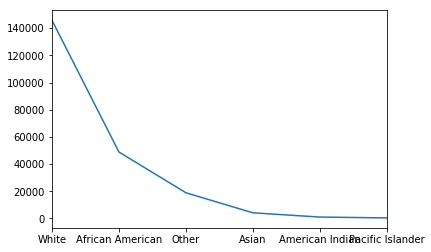

In [143]:
df['race'].value_counts().plot()

## Find every injury involving unicycles.

In [166]:
df_uni = df[df['prod1'].str.contains(1283)]
df_uni
#df['prod1'].findall('1283')
#df_unicycle = df[df['narr1'].str.contains("UNI")]
#df_unicycle

AttributeError: Can only use .str accessor with string values, which use np.object_ dtype in pandas

In [158]:
df_unicycle = df[df['narr1'].str.contains("UNI")]
df_unicycle
df_unicycle['race'].value_counts()

White               141
African American     25
Other                 9
Asian                 4
Name: race, dtype: int64

## What is the racial breakdown of people involved in unicycle accidents?

I want a **percentage**, and I want that percentage to include unknowns/NaN values.

## How about injuries with toboggans?

Is the racial breakdown significantly different than the racial breakdown of all patients?

## Find the top 5 most dangerous products

Just use the `prod1` column.

## Find the top 5 most dangerous products by race

This is that weird groupby thing that you can either memorize or cut and paste every time. If you ask I'll tell it to you and you won't have to search!